In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("08-exercise-pids2023.ipynb")

# Exercise sheet 8
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Central Limit Theorem
* Confidence Interval


Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "08-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *08-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 25.04.2023 <br>
**Submission date**: 02.05.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# 1 (8 points)
We define a random variable $X_\text{mean}$ as follows:
$$
X_\text{mean} = \dfrac{1}{N} \sum_{i=1}^N X_i 
$$
Where $X_i \sim$ Binomial($n,p$). As discussed in the last lecture, we can analytically compute the mean and variance of this random variable:
$$
\mathbb{E}[X_\text{mean}] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E}[X_i] = np
$$
$$
\text{Var}[X_\text{mean}] = \dfrac{1}{N^2} \sum_{i=1}^N \text{Var}[X_i] = \dfrac{np(1-p)}{N}
$$
In this exercise, we want to verify the analytical results experimentally.
As the first step, let's define a Binomial random variable:

In [3]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Generate a matrix with size $m \times N$ containing samples from the given Binomial distribution and store the matrix in variable 'x'. Then calculate the mean of each row of matrix 'x' and and store the row-wise means in a vector with size $m$ and call it 'mean'. Plot the histogram of the calculated 'mean' vector.

**Important**: Please do not make a new cell for the plot. Plot the histogram in the same cell.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it.

In [4]:
m = 100
N = 10
np.random.seed(0)

x = X.rvs(size=(m, N))
mean = x.mean(axis=1)

In [5]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (4 points)
Now we want to repeat this process for $N=\{1,2,...,k\}$ instead of a single $N=10$. So write a code to generate the mean for each $N$ (as you did for $N=10$) and store all the calculated means in "means" which would be a matrix with size $k \times m$.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it. You can use "for-loop" anywhere else.

In [6]:
m = 100
k = 50
np.random.seed(0)
means = np.zeros([k,m])
for i in range(k):
    x = X.rvs(size=(m, i+1))
    means[i] = x.mean(axis=1)

In [7]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (2 points)
Now calculate the variance of the mean for a given N. This means that you need to calculate the variance of each row of the matrix "means" in 1b. Store the variances in a vector with size k and call this vector "variences". Plot the histogram of variences for $N=\{1,2,...,k\}$.

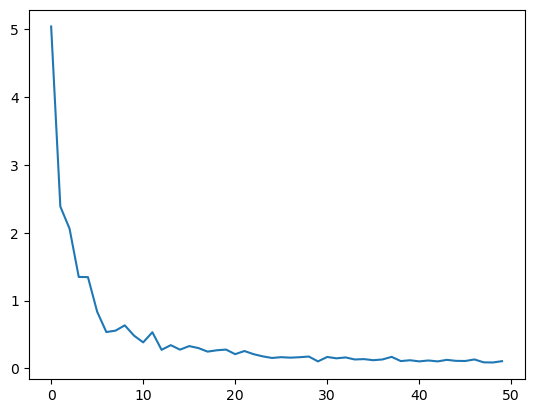

In [17]:
variances = means.var(axis=1)
plt.plot(variances)

In [9]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

Does the variance decrease as we increase the number of samples ($N$)? Why?

Yes, the variance of the mean decreases as we increase the number of trials (N) in the binomial distribution.

The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent trials, where each trial has a constant probability of success (p) and failure (1-p). The mean of the binomial distribution is given by μ = Np, and the variance is given by σ^2 = Np(1-p).

As we increase the number of trials (N), the variance (σ^2) increases proportionally to Np(1-p), while the mean (μ) increases linearly with N. Therefore, the variance of the mean, which is given by σ^2/N, decreases as we increase N.

This is known as the law of large numbers, which states that as the sample size (N) increases, the sample mean becomes a more accurate estimate of the population mean, and the variance of the sample mean decreases.

# 2 (7 points)
## Confidence Interval
In this exercise, we work on confidence interval calculation using bottstrap technique.
Let's generate $N$ samples from Gaussian distribution:

<Axes: ylabel='Count'>

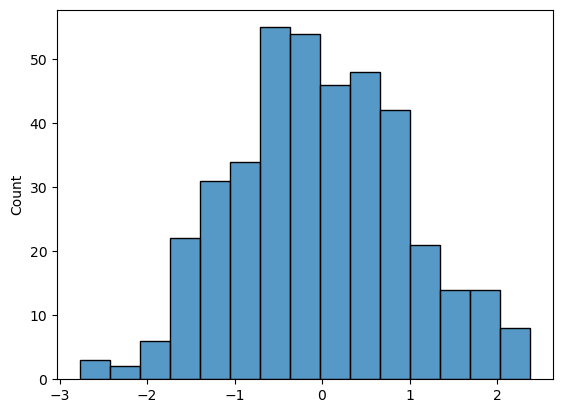

In [10]:
mu = 0.0
sigma = 1.0
N = 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 2a (3 points)

As discussed in the previous lecture, we can use the bootstrap technique to find the confidence interval. In this exersice, we are going to estimate the confidence interval using bootstrap technique. For this we use the bootstrap function from the scipy.stats module.

Given $N$ samples and a confidence level of 0.95, the scipy bootstrap function does the following steps to calculate the confidence interval:
1. Randomly select $N$ samples with replacement from the given samples. Sampling with replacement allows us to generate different batches of samples with size $N$ from a single set.
2. Calculate the mean of the $N$ selected samples.
3. Repeat steps 1 and 2 for a total of $k$ times and store the means in a vector.
4. Calculate the 2.5th and 97.5th percentiles of the means vector and store them in the 'CI' variable.

This function calculates the confidence interval of a given statistic, such as mean or median. Let's use the scipy bootstrap function to estimate the confidence interval and store the function output in 'bootstrap_ci' variable. Note that we are estimating the 'mean' and using the 'percentile' method.
Please visit [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html) website for further information.

In [11]:
from scipy.stats import bootstrap
import numpy as np

k = 50
confidence_level = 0.95
np.random.seed(0)

...

CI_scipy = [bootstrap_ci.confidence_interval[0], bootstrap_ci.confidence_interval[1]]
print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(confidence_level, N,CI_scipy[0], CI_scipy[1]))

NameError: name 'bootstrap_ci' is not defined

In [ ]:
grader.check("Question 2a")

### 2b (1 points)
Compute the confidence interval for $N = 4000$ (instead of 400) and store the function output in 'bootstrap_ci_4000'.

In [ ]:
from scipy.stats import bootstrap
import numpy as np

mu = 0.0
sigma = 1.0
N = 4000 # previously 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

k = 50
confidence_level = 0.95

...

CI_scipy_4000 = [bootstrap_ci_4000.confidence_interval[0], bootstrap_ci_4000.confidence_interval[1]]
print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(confidence_level,
                                                                         N,CI_scipy_4000[0],
                                                                         CI_scipy_4000[1]))

In [ ]:
grader.check("Question 2b")

Does the confidencence interval shrinke by increasing the number of samples ($N$)? Why?

### 2c (3 points)

In this exercise, we will implement the bootstrap technique from scratch to estimate the confidence interval of a given set of samples. Please implement the steps explained in question 2a. This will allow us to compare our implementation with the one provided by scipy.stats module. Please store the estimated confidence interval in the 'CI' variable.

In [ ]:
N = 4000 # previously 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)

k = 50
confidence_level = 0.95

...

print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(confidence_level, N,CI[0], CI[1]))

In [ ]:
grader.check("Question 2c")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()